### Ejercicio:

Calcular la temperatura en Nueva York hasta 2045

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.pylab
plt.rcParams['figure.figsize']=(20,10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp_df = pd.read_csv('datasets/temp_NY.csv', 
                       index_col='year',
                       parse_dates=True)

In [6]:
temp_df.head(3)

,temperature
year,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3


In [7]:
# Convert the index to a datetime object
temp_df.index = pd.to_datetime(temp_df.index, format='%Y')

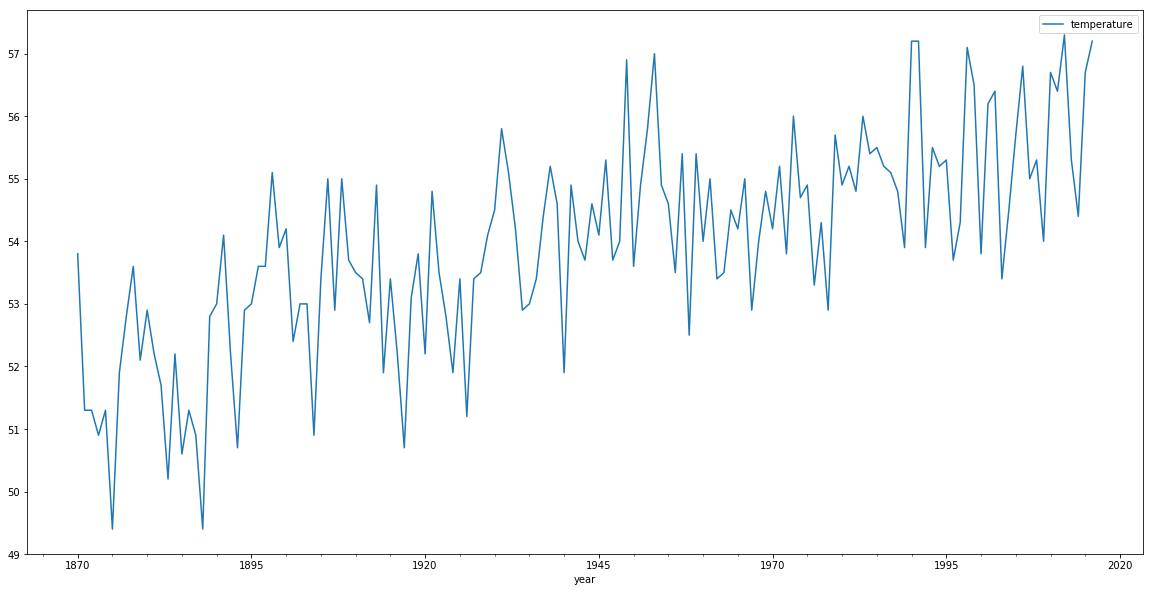

In [9]:
# Plot average temperatures
temp_df.plot()

In [10]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

In [11]:
# Compute and print ADF p-value
result = adfuller(temp_df['temperature'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.583293898787111


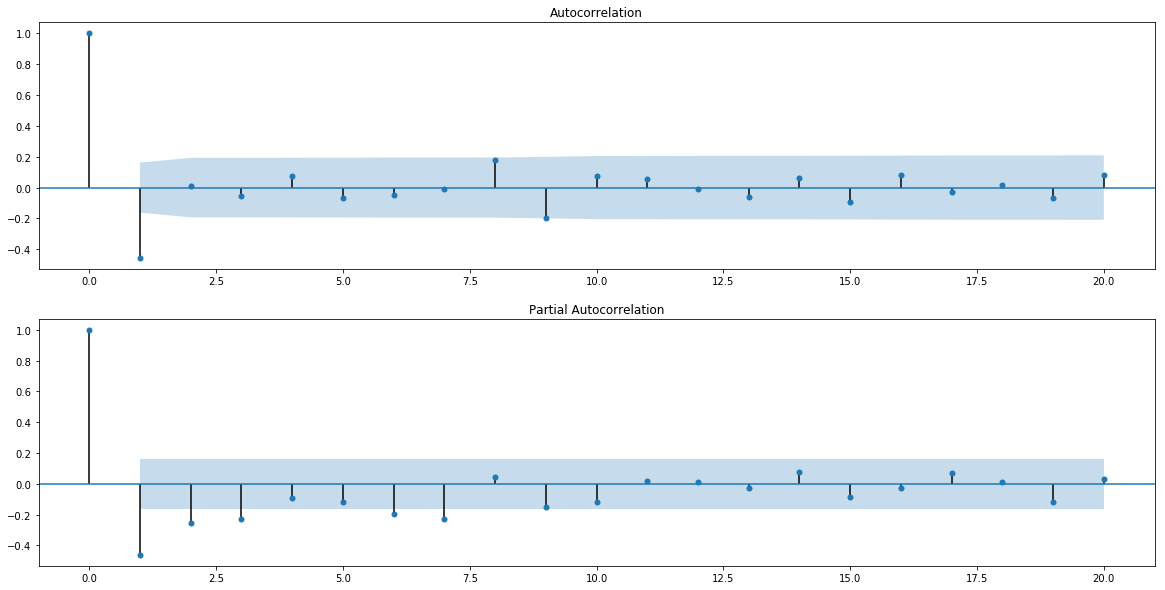

In [13]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_df.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [14]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0))
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2,0))
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1))
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1))
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.9274123160228
The AIC for an MA(1) is:  469.3909693438297
The AIC for an ARMA(1,1) is:  469.07291101738303


/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/Users/CotePelaez/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


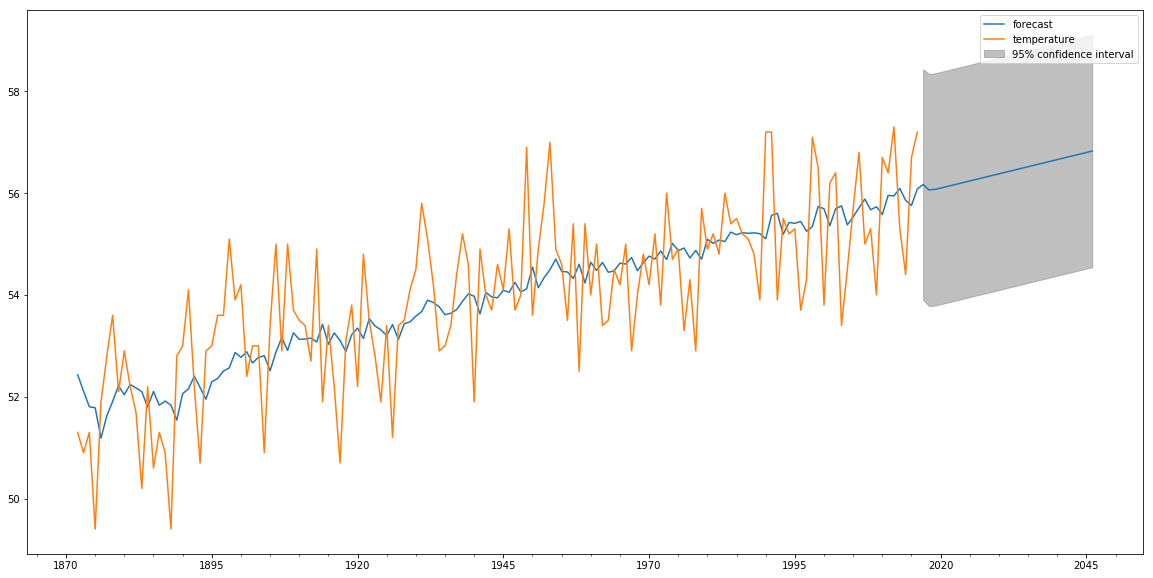

In [16]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_df, order=(1,1,1))
res = mod.fit()
 
# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()